<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📐 Setup MMDetection</span>

In [1]:
# !pip install mmsegmentation

In [2]:
%%bash
# Check nvcc version
nvcc -V
echo
# Check GCC version
gcc --version
echo
# Check the version of torch and cuda packages
pip list | grep "torch\|cuda"

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.


torch                  1.9.0
torchelastic           0.2.0
torchtext              0.10.0
torchvision            0.10.0


In [3]:
# # Install PyTorch
# !conda install pytorch=1.10.0 torchvision cudatoolkit=11.1 -c pytorch
# # Install MMCV
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10/index.html
# !mim install mmdet

In [4]:
import os
# !rm -rf mmsegmentation
# !git clone https://github.com/open-mmlab/mmsegmentation.git 
# %cd mmsegmentation
# !pip install -e .
# os.chdir("/home/xuchen/Desktop/openmmlab/mmseg_training_segmetation/mmsegmentation/checkpoints/0_mmseg/mmseg_training_segmetation")

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Setup Weights & Biases</span>

In [5]:
# %%capture
# !pip install wandb --upgrade

In [6]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xuchenweights. Use `wandb login --relogin` to force relogin


True

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 system info</span>

In [7]:
import sys
print(f"use python version and path: {os.path.abspath(sys.executable)}")
print("jupyter-lab path 系统搜索路径:{}".format(sys.path[0]))
print(f"当前工作目录 文件读写等相关操作使用的基本路径。{os.getcwd()}")

use python version and path: /opt/conda/bin/python
jupyter-lab path 系统搜索路径:/mmdetection/workspace
当前工作目录 文件读写等相关操作使用的基本路径。/mmdetection/workspace


<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Imports and Seed Everything</span>

In [8]:
import torch, torchvision
print(f"torch version: {torch.__version__}")
print(f"torch cuda is_available: {torch.cuda.is_available()}")

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(f"get_compiling_cuda_version: {get_compiling_cuda_version()}")
print(f"get_compiler_version: {get_compiler_version()}")
import mmcv
# Imports
import mmseg
print(f"mmseg version is :{mmseg.__version__}")


from mmseg.models import build_segmentor



import numpy as np
from pathlib import Path
import json
from pycocotools.coco import COCO
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import os.path as osp 

torch version: 1.9.0
torch cuda is_available: True
get_compiling_cuda_version: 11.1
get_compiler_version: GCC 7.3
mmseg version is :1.0.0


In [9]:
# from mmseg.datasets import build_dataset
# from mmseg.apis import train_segmentor
# from mmseg.apis import inference_segmentor

In [10]:
import random
from mmengine.runner import set_random_seed
seed = 1234
# data_folder_name ="../data"
"""Sets the random seeds."""
set_random_seed(seed, deterministic=False)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
#torch.backends.cudnn.deterministic 确定性的
#是啥？确定性的，顾名思义，将这个 flag 置为True的话，每次返回的卷积算法将是确定的，即默认算法。如果配合上设置 Torch 的随机种子为固定值的话，
#应该可以保证每次运行网络的时候相同输入的输出是固定的，代码大致这样
torch.backends.cudnn.deterministic = True
#设置 torch.backends.cudnn.benchmark=True 将会让程序在开始时花费一点额外时间，为整个网络的每个卷积层搜索最适合它的卷积实现算法，
#进而实现网络的加速。适用场景是网络结构固定（不是动态变化的），网络的输入形状（包括 batch size，图片大小，输入的通道）是不变的，
#其实也就是一般情况下都比较适用。反之，如果卷积层的设置一直变化，将会导致程序不停地做优化，反而会耗费更多的时间。
torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED'] = str(seed)

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 show image </span>

In [11]:
import os
import mmcv

input_folder = '/mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val'
output_folder = '/mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2'
target_size = 1024

file_list = os.listdir(input_folder)

for filename in file_list:
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        # 构建输入文件的完整路径
        input_path = os.path.join(input_folder, filename)
        
        # 打开图像
        image = mmcv.imread(input_path)
        
        # 构建输出文件的完整路径
        # 我们要确保输出的文件格式是.jpg
        basename = os.path.splitext(filename)[0]
        output_path = os.path.join(output_folder, basename + '.jpg')
        
        # 保存调整大小后的图像
        mmcv.imwrite(image, output_path)

        print('已保存:', output_path)


/opt/conda/lib/python3.7/site-packages/mmcv/image/io.py:348: UserWarning: The parameter `auto_mkdir` will be deprecated in the future and every file clients will make directory automatically.
  'The parameter `auto_mkdir` will be deprecated in the future and '


已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/dua-hau-1.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/OIP (4).jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/R.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/depositphotos_204189678-stock-photo-slice-watermelon-white-background.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/5b3c8018N634d43bd.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/la_wm_img01.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/abc.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/denn-ke-11-7.jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2/OIP (11).jpg
已保存: /mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/i

You can change the test_n to get a different split

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 download model and default config</span>

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Setting base default setting</span>

In [12]:
from mmengine import Config
baseline_cfg_path = '../mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb4-20k_coco-stuff10k-512x512.py'
# /mmsegmentation/configs/mask2former/mask2former_swin-s_8xb2-160k_xuchen-512x512.py
cfg = Config.fromfile(baseline_cfg_path)
model_name = baseline_cfg_path.split("/")[-1].split(".")[0]
print(f"config base model of :{model_name} ")

config base model of :pspnet_r50-d8_4xb4-20k_coco-stuff10k-512x512 


In [13]:
cfg.norm_cfg = dict(type='BN', requires_grad=True)
# cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.crop_size = (512, 512)
cfg.model.data_preprocessor.size = cfg.crop_size

cfg.data_root = "../data"
train_img_dir="balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/train2"
train_ann_dir="balloon_dataset/Watermelon87_Semantic_Seg_Mask/ann_dir/train"
cfg.num_classes = 6
cfg.model.decode_head.num_classes = 6

cfg.train_dataloader.dataset.type='DubaiDataset'
cfg.train_dataloader.dataset.data_root=cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=train_img_dir, seg_map_path=train_ann_dir)
# cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'
val_img_dir="balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/val2"
val_ann_dir="balloon_dataset/Watermelon87_Semantic_Seg_Mask/ann_dir/val"
cfg.val_dataloader.dataset.type='DubaiDataset'
cfg.val_dataloader.dataset.data_root=cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=val_img_dir, seg_map_path=val_ann_dir)
# cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'
cfg.test_dataloader.dataset.type='DubaiDataset'
# Set up working dir to save files and logs.
cfg.work_dir = 'workspace/work_dirs'

# cfg.default_hooks.checkpoint.interval =400
cfg.train_cfg.val_interval =200
cfg.train_dataloader.num_workers= 4
cfg.train_dataloader.batch_size = 2
cfg.val_dataloader.num_workers = 4
cfg.test_dataloader.num_workers = 4

# cfg.train_dataloader = cfg.data_root
# cfg.val_dataloader = cfg.data_root
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', reduce_zero_label=True),
    dict(
        type='RandomResize',
        scale=(1025, 512),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(256, 256), cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    # dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]

# print(f'Config:\n{cfg.pretty_text}')

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Setting if train and log config</span>

In [14]:
# Change the wandb username and project name below
# wnb_username = 'xuchenweights'
# wnb_project_name = model_name

# import time 
# s = time.time()
# s=time.gmtime(s)
# str_time =time.strftime("%Y-%m-%d_%H-%M-%S", s)
# #TextLoggerHook is default ，so set WandbLoggerHook
# cfg.default_hooks = [dict(type='TextLoggerHook'),
#                         dict(type='WandbLoggerHook',
#                              init_kwargs=dict(project=wnb_project_name,
#                                               name=f'exp-{model_name}-{data_folder_name}-{str_time}',
#                                               entity=wnb_username))
#                        ]

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🚀 Build Dataset and Start Training</span>

In [15]:
if_train = True

In [16]:
from mmengine.runner import Runner
if if_train:
    runner = Runner.from_cfg(cfg)

06/17 19:16:15 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Feb 26 2021, 18:47:35) [GCC 7.3.0]
    CUDA available: True
    numpy_random_seed: 822569775
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode

/mmdetection/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/mmdetection/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/mmdetection/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


06/17 19:16:17 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/17 19:16:17 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/mmdetection/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [17]:
# start training
if if_train:
 runner.train()

/mmdetection/mmsegmentation/mmseg/datasets/transforms/loading.py:78: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


06/17 19:16:17 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/17 19:16:17 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/17 19:16:17 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/17 19:16:18 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/17 19:16:18 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/17 19:16:18 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/17 19:16:18 - mmengine - INFO - Checkpoints will be saved to /mmdetection/workspace/workspace/work_dirs.


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


06/17 19:16:39 - mmengine - INFO - Exp name: pspnet_r50-d8_4xb4-20k_coco-stuff10k-512x512_20230617_191614
06/17 19:16:39 - mmengine - INFO - Iter(train) [   35/20000]  lr: 9.9849e-03  eta: 3:21:11  time: 0.4900  data_time: 0.0023  memory: 5368  loss: 0.6025  decode.loss_ce: 0.3167  decode.acc_seg: 93.3709  aux.loss_ce: 0.2859  aux.acc_seg: 82.2813
06/17 19:16:46 - mmengine - INFO - Iter(train) [   50/20000]  lr: 9.9782e-03  eta: 3:10:42  time: 0.5031  data_time: 0.0024  memory: 4125  loss: 0.4651  decode.loss_ce: 0.2573  decode.acc_seg: 80.4899  aux.loss_ce: 0.2077  aux.acc_seg: 77.1926
06/17 19:17:12 - mmengine - INFO - Iter(train) [  100/20000]  lr: 9.9559e-03  eta: 2:59:35  time: 0.5168  data_time: 0.0024  memory: 4126  loss: 0.2305  decode.loss_ce: 0.1420  decode.acc_seg: 92.6033  aux.loss_ce: 0.0885  aux.acc_seg: 93.9333
06/17 19:17:37 - mmengine - INFO - Iter(train) [  150/20000]  lr: 9.9336e-03  eta: 2:55:59  time: 0.5087  data_time: 0.0026  memory: 4126  loss: 0.2026  decode.lo

KeyboardInterrupt: 

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📰 Inference and Visualize Output</span>

In [21]:
# data_folder_name ="powertain_goods_data"
from mmengine import Config
baseline_cfg_path = '/mmdetection/workspace/workspace/work_dirs/pspnet_r50-d8_4xb4-20k_coco-stuff10k-512x512.py'
# /mmsegmentation/configs/mask2former/mask2former_swin-s_8xb2-160k_xuchen-512x512.py
cfg = Config.fromfile(baseline_cfg_path)
model_name = baseline_cfg_path.split("/")[-1].split(".")[0]
print(f"config base model of :{model_name} ")

config base model of :pspnet_r50-d8_4xb4-20k_coco-stuff10k-512x512 


In [22]:
from mmseg.apis import init_model, inference_model, show_result_pyplot
# Init the model from the config and the checkpoint
checkpoint_path = cfg.work_dir +'/iter_6000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: workspace/work_dirs/iter_6000.pth


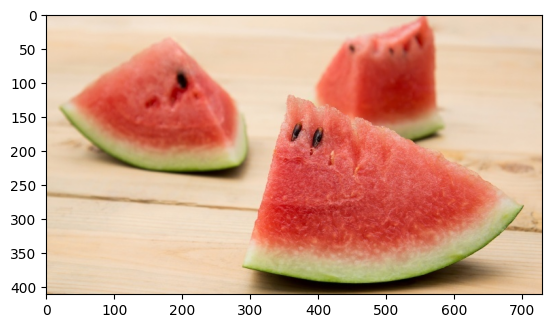

In [39]:
adress = "/mmdetection/data/balloon_dataset/Watermelon87_Semantic_Seg_Mask/img_dir/train2/shutterstock_457769608.jpg"

img = mmcv.imread(adress)
plt.imshow(img[:,:,::-1])
plt.show()

In [32]:
result = inference_model(model, img)

In [33]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [34]:
pred_mask.shape

(411, 730)

In [35]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4])

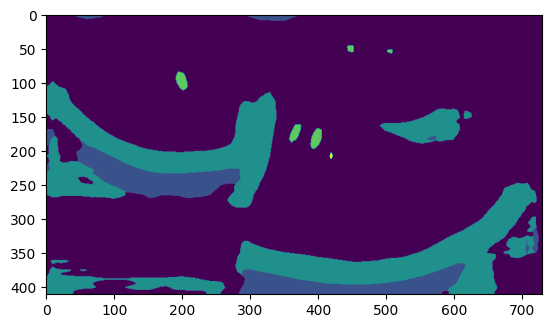

In [36]:

plt.imshow(pred_mask)
plt.show()